In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [232]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [191]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [210]:
df=df.rename(columns={"price":"target"})

In [233]:
# df[['cylindernumber','target']].groupby(['cylindernumber']).describe()

KeyError: "['target'] not in index"

In [216]:
df.loc[ df['enginelocation'] == 'front', 'enginelocation' ] = 1
df.loc[ df['enginelocation'] == 'rear', 'enginelocation' ] = 0
df.enginelocation = df.enginelocation.astype('int64')

df.loc[ df['aspiration'] == 'std', 'aspiration' ] = 1
df.loc[ df['aspiration'] == 'turbo', 'aspiration' ] = 0
df.aspiration = df.aspiration.astype('int64')


df.loc[ df['fueltype'] == 'gas', 'fueltype' ] = 1
df.loc[ df['fueltype'] == 'diesel', 'fueltype' ] = 0
df.fueltype = df.fueltype.astype('int64')

df.loc[ df['carbody'] == 'sedan', 'carbody' ] = 0
df.loc[ df['carbody'] == 'hatchback', 'carbody' ] = 1
df.loc[ df['carbody'] == 'wagon', 'carbody' ] = 2
df.loc[ df['carbody'] == 'hardtop', 'carbody' ] = 3
df.loc[ df['carbody'] == 'convertible', 'carbody' ] = 4
df.carbody = df.carbody.astype('int64')

df.loc[ df['drivewheel'] == 'fwd', 'drivewheel' ] = 0
df.loc[ df['drivewheel'] == 'rwd', 'drivewheel' ] = 1
df.loc[ df['drivewheel'] == '4wd', 'drivewheel' ] = 2
df.drivewheel = df.drivewheel.astype('int64')

df.loc[ df['enginetype'] == 'ohc', 'enginetype' ] = 0
df.loc[ df['enginetype'] == 'ohcf' , 'enginetype' ] = 1
df.loc[ df['enginetype'] == 'ohcv', 'enginetype' ] = 1
df.loc[ df['enginetype'] == 'dohc' , 'enginetype' ] = 2
df.loc[ df['enginetype'] == 'dohcv', 'enginetype' ] = 2
df.loc[ df['enginetype'] == 'l', 'enginetype' ] = 3
df.loc[ df['enginetype'] == 'rotor', 'enginetype' ] = 4
df.enginetype = df.enginetype.astype('int64')

df.loc[ df['cylindernumber'] == 'eight', 'cylindernumber' ] = 8
df.loc[ df['cylindernumber'] == 'five', 'cylindernumber' ] = 5
df.loc[ df['cylindernumber'] == 'four', 'cylindernumber' ] = 4
df.loc[ df['cylindernumber'] == 'six', 'cylindernumber' ] = 6
df.loc[ df['cylindernumber'] == 'three', 'cylindernumber' ] = 3
df.loc[ df['cylindernumber'] == 'twelve', 'cylindernumber' ] = 12
df.loc[ df['cylindernumber'] == 'two', 'cylindernumber' ] = 2
df.cylindernumber = df.cylindernumber.astype('int64')

In [217]:
df['enginetype'].value_counts()

0    148
1     28
2     13
3     12
4      4
Name: enginetype, dtype: int64

In [218]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype              int64
aspiration            int64
doornumber           object
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
target              float64
dtype: object

In [219]:
abs(df.corr()).sort_values(by="target")

,car_ID,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,target
compressionratio,0.150276,0.178515,0.984356,0.295541,0.105144,0.018903,0.019762,0.249786,0.158414,0.181129,...,0.020002,0.028971,0.005197,0.186110,1.000000,0.204326,0.435741,0.324701,0.265201,0.067984
stroke,0.160824,0.008735,0.241829,0.222982,0.092747,0.192827,0.138455,0.160959,0.129533,0.182942,...,0.008210,0.203129,0.055909,1.000000,0.186110,0.080940,0.067964,0.042145,0.043931,0.079443
symboling,0.151621,1.000000,0.194311,0.059866,0.301354,0.111150,0.212471,0.531954,0.357612,0.232919,...,0.113129,0.105790,0.130051,0.008735,0.178515,0.070873,0.273606,0.035823,0.034606,0.079978
peakrpm,0.203789,0.273606,0.476883,0.183383,0.006010,0.139905,0.198461,0.360469,0.287242,0.220012,...,0.124172,0.244660,0.254976,0.067964,0.435741,0.131073,1.000000,0.113544,0.054275,0.085267
fueltype,0.125568,0.194311,1.000000,0.401397,0.106275,0.051874,0.040070,0.308346,0.212679,0.233880,...,0.024544,0.069594,0.054451,0.241829,0.984356,0.163926,0.476883,0.255963,0.191392,0.105679
carbody,0.075215,0.301354,0.106275,0.055455,1.000000,0.178462,0.309907,0.170051,0.071322,0.045453,...,0.032394,0.104722,0.154351,0.092747,0.105144,0.129639,0.006010,0.137525,0.143814,0.107031
car_ID,1.000000,0.151621,0.125568,0.067729,0.075215,0.104650,0.051483,0.129729,0.170636,0.052387,...,0.094493,0.033930,0.260064,0.160824,0.150276,0.015006,0.203789,0.015940,0.011255,0.109093
carheight,0.255960,0.541038,0.284631,0.087311,0.078912,0.137255,0.106234,0.589435,0.491029,0.279210,...,0.013995,0.067149,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.107358,0.119336
aspiration,0.067729,0.059866,0.401397,1.000000,0.055455,0.153897,0.057191,0.257611,0.234539,0.300567,...,0.047972,0.108217,0.212614,0.222982,0.295541,0.241685,0.183383,0.202362,0.254416,0.177926
enginetype,0.017062,0.106421,0.078088,0.075891,0.101292,0.389462,0.060007,0.266527,0.267809,0.254436,...,0.012309,0.148325,0.302011,0.204842,0.063755,0.263968,0.029133,0.323343,0.348707,0.223139


In [220]:
df = df.drop("car_ID",axis=1)
df = df.drop("CarName",axis=1)
df = df.drop("enginetype",axis=1)
# df = df.drop("cylindernumber",axis=1)
df = df.drop("doornumber",axis=1)
df = df.drop("fuelsystem",axis=1)
df = df.drop("symboling",axis=1)

In [221]:
df.dtypes

fueltype              int64
aspiration            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
cylindernumber        int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
target              float64
dtype: object

In [222]:
df.head(5)

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,target
0,1,1,4,1,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,4,1,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,1,0,0,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,1,0,2,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [223]:
abs(df.corr()).sort_values(by="target")

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,target
compressionratio,0.984356,0.295541,0.105144,0.018903,0.019762,0.249786,0.158414,0.181129,0.261214,0.151362,0.020002,0.028971,0.005197,0.186110,1.000000,0.204326,0.435741,0.324701,0.265201,0.067984
stroke,0.241829,0.222982,0.092747,0.192827,0.138455,0.160959,0.129533,0.182942,0.055307,0.168790,0.008210,0.203129,0.055909,1.000000,0.186110,0.080940,0.067964,0.042145,0.043931,0.079443
peakrpm,0.476883,0.183383,0.006010,0.139905,0.198461,0.360469,0.287242,0.220012,0.320411,0.266243,0.124172,0.244660,0.254976,0.067964,0.435741,0.131073,1.000000,0.113544,0.054275,0.085267
fueltype,1.000000,0.401397,0.106275,0.051874,0.040070,0.308346,0.212679,0.233880,0.284631,0.217275,0.024544,0.069594,0.054451,0.241829,0.984356,0.163926,0.476883,0.255963,0.191392,0.105679
carbody,0.106275,0.055455,1.000000,0.178462,0.309907,0.170051,0.071322,0.045453,0.078912,0.084982,0.032394,0.104722,0.154351,0.092747,0.105144,0.129639,0.006010,0.137525,0.143814,0.107031
carheight,0.284631,0.087311,0.078912,0.137255,0.106234,0.589435,0.491029,0.279210,1.000000,0.295572,0.013995,0.067149,0.171071,0.055307,0.261214,0.108802,0.320411,0.048640,0.107358,0.119336
aspiration,0.401397,1.000000,0.055455,0.153897,0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,0.047972,0.108217,0.212614,0.222982,0.295541,0.241685,0.183383,0.202362,0.254416,0.177926
enginelocation,0.040070,0.057191,0.309907,0.113823,1.000000,0.187790,0.050989,0.051698,0.106234,0.050468,0.183048,0.196826,0.185042,0.138455,0.019762,0.317839,0.198461,0.153487,0.102026,0.324973
drivewheel,0.051874,0.153897,0.178462,1.000000,0.113823,0.366828,0.416076,0.376554,0.137255,0.573813,0.267163,0.409914,0.512709,0.192827,0.018903,0.445806,0.139905,0.503655,0.549492,0.490739
boreratio,0.054451,0.212614,0.154351,0.512709,0.185042,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,0.055909,0.005197,0.573677,0.254976,0.584532,0.587012,0.553173


In [224]:
X = df.drop('target', axis=1)
y = df['target']

In [225]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=42)

<AxesSubplot:>

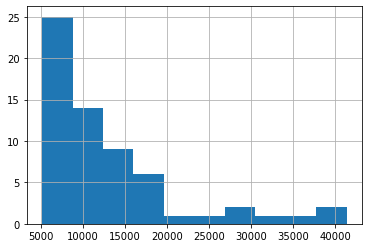

In [226]:
y_test.hist()

<AxesSubplot:>

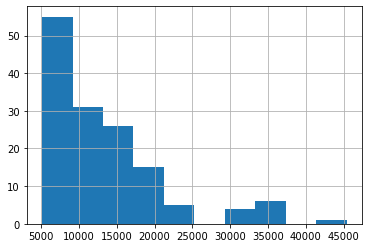

In [227]:
y_train.hist()

In [228]:
model = keras.models.Sequential([
                    keras.layers.Input(shape=X_train.shape[1]),
                    keras.layers.Dense(500, activation='relu'),
                    keras.layers.Dense(500, activation='relu'),
                    keras.layers.Dense(250, activation='relu'),
                    keras.layers.Dense(250, activation='relu'),
                    keras.layers.Dense(125, activation='relu'),
                    keras.layers.Dense(125, activation='relu'),
                    keras.layers.Dense(1)
                    ])

In [229]:
model.compile(
            loss='mape',
            optimizer='adam',
            metrics= ['MAPE']
            )

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 500)               10000     
_________________________________________________________________
dense_22 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_23 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_24 (Dense)             (None, 250)               62750     
_________________________________________________________________
dense_25 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_26 (Dense)             (None, 125)               15750     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [230]:
hist = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
5/5 [==============================] - 1s 54ms/step - loss: 94.3987 - MAPE: 94.3987 - val_loss: 53.7795 - val_MAPE: 53.7795
Epoch 2/300
5/5 [==============================] - 0s 13ms/step - loss: 44.8585 - MAPE: 44.8585 - val_loss: 48.7525 - val_MAPE: 48.7525
Epoch 3/300
5/5 [==============================] - 0s 12ms/step - loss: 43.5844 - MAPE: 43.5844 - val_loss: 37.7324 - val_MAPE: 37.7324
Epoch 4/300
5/5 [==============================] - 0s 13ms/step - loss: 36.9756 - MAPE: 36.9756 - val_loss: 27.7660 - val_MAPE: 27.7660
Epoch 5/300
5/5 [==============================] - 0s 13ms/step - loss: 32.1961 - MAPE: 32.1961 - val_loss: 29.1178 - val_MAPE: 29.1178
Epoch 6/300
5/5 [==============================] - 0s 14ms/step - loss: 31.5271 - MAPE: 31.5271 - val_loss: 26.0709 - val_MAPE: 26.0709
Epoch 7/300
5/5 [==============================] - 0s 14ms/step - loss: 28.4560 - MAPE: 28.4560 - val_loss: 26.3841 - val_MAPE: 26.3841
Epoch 8/300
5/5 [==============================]

Epoch 61/300
5/5 [==============================] - 0s 12ms/step - loss: 20.0778 - MAPE: 20.0778 - val_loss: 20.5713 - val_MAPE: 20.5713
Epoch 62/300
5/5 [==============================] - 0s 12ms/step - loss: 20.8973 - MAPE: 20.8973 - val_loss: 15.4035 - val_MAPE: 15.4035
Epoch 63/300
5/5 [==============================] - 0s 12ms/step - loss: 19.1715 - MAPE: 19.1715 - val_loss: 16.9200 - val_MAPE: 16.9200
Epoch 64/300
5/5 [==============================] - 0s 13ms/step - loss: 20.7706 - MAPE: 20.7706 - val_loss: 18.5704 - val_MAPE: 18.5704
Epoch 65/300
5/5 [==============================] - 0s 13ms/step - loss: 23.2757 - MAPE: 23.2757 - val_loss: 17.7400 - val_MAPE: 17.7400
Epoch 66/300
5/5 [==============================] - 0s 12ms/step - loss: 20.6693 - MAPE: 20.6693 - val_loss: 20.3524 - val_MAPE: 20.3524
Epoch 67/300
5/5 [==============================] - 0s 11ms/step - loss: 19.1586 - MAPE: 19.1586 - val_loss: 19.3421 - val_MAPE: 19.3421
Epoch 68/300
5/5 [=======================

5/5 [==============================] - 0s 13ms/step - loss: 16.1223 - MAPE: 16.1223 - val_loss: 15.7198 - val_MAPE: 15.7198
Epoch 121/300
5/5 [==============================] - 0s 13ms/step - loss: 17.4582 - MAPE: 17.4582 - val_loss: 14.7940 - val_MAPE: 14.7940
Epoch 122/300
5/5 [==============================] - 0s 12ms/step - loss: 16.3513 - MAPE: 16.3513 - val_loss: 14.4081 - val_MAPE: 14.4081
Epoch 123/300
5/5 [==============================] - 0s 13ms/step - loss: 17.0926 - MAPE: 17.0926 - val_loss: 15.7417 - val_MAPE: 15.7417
Epoch 124/300
5/5 [==============================] - 0s 12ms/step - loss: 16.3635 - MAPE: 16.3635 - val_loss: 15.5690 - val_MAPE: 15.5690
Epoch 125/300
5/5 [==============================] - 0s 13ms/step - loss: 17.4042 - MAPE: 17.4042 - val_loss: 14.5234 - val_MAPE: 14.5234
Epoch 126/300
5/5 [==============================] - 0s 11ms/step - loss: 16.3560 - MAPE: 16.3560 - val_loss: 14.7079 - val_MAPE: 14.7079
Epoch 127/300
5/5 [=============================

5/5 [==============================] - 0s 12ms/step - loss: 15.9083 - MAPE: 15.9083 - val_loss: 14.5943 - val_MAPE: 14.5943
Epoch 180/300
5/5 [==============================] - 0s 14ms/step - loss: 14.9306 - MAPE: 14.9306 - val_loss: 14.2597 - val_MAPE: 14.2597
Epoch 181/300
5/5 [==============================] - 0s 16ms/step - loss: 16.0722 - MAPE: 16.0722 - val_loss: 19.6557 - val_MAPE: 19.6557
Epoch 182/300
5/5 [==============================] - 0s 14ms/step - loss: 22.4914 - MAPE: 22.4914 - val_loss: 14.5330 - val_MAPE: 14.5330
Epoch 183/300
5/5 [==============================] - 0s 13ms/step - loss: 15.0154 - MAPE: 15.0154 - val_loss: 15.2591 - val_MAPE: 15.2591
Epoch 184/300
5/5 [==============================] - 0s 12ms/step - loss: 15.0392 - MAPE: 15.0392 - val_loss: 14.6383 - val_MAPE: 14.6383
Epoch 185/300
5/5 [==============================] - 0s 13ms/step - loss: 15.5392 - MAPE: 15.5392 - val_loss: 14.2452 - val_MAPE: 14.2452
Epoch 186/300
5/5 [=============================

5/5 [==============================] - 0s 13ms/step - loss: 16.8239 - MAPE: 16.8239 - val_loss: 13.8116 - val_MAPE: 13.8116
Epoch 239/300
5/5 [==============================] - 0s 12ms/step - loss: 15.0849 - MAPE: 15.0849 - val_loss: 16.7299 - val_MAPE: 16.7299
Epoch 240/300
5/5 [==============================] - 0s 13ms/step - loss: 15.8203 - MAPE: 15.8203 - val_loss: 17.8170 - val_MAPE: 17.8170
Epoch 241/300
5/5 [==============================] - 0s 12ms/step - loss: 17.8352 - MAPE: 17.8352 - val_loss: 18.6524 - val_MAPE: 18.6524
Epoch 242/300
5/5 [==============================] - 0s 13ms/step - loss: 17.8642 - MAPE: 17.8642 - val_loss: 17.4555 - val_MAPE: 17.4555
Epoch 243/300
5/5 [==============================] - 0s 12ms/step - loss: 18.8932 - MAPE: 18.8932 - val_loss: 15.9395 - val_MAPE: 15.9395
Epoch 244/300
5/5 [==============================] - 0s 13ms/step - loss: 15.0423 - MAPE: 15.0423 - val_loss: 14.4708 - val_MAPE: 14.4708
Epoch 245/300
5/5 [=============================

5/5 [==============================] - 0s 13ms/step - loss: 14.6676 - MAPE: 14.6676 - val_loss: 14.7804 - val_MAPE: 14.7804
Epoch 298/300
5/5 [==============================] - 0s 12ms/step - loss: 14.7903 - MAPE: 14.7903 - val_loss: 15.2997 - val_MAPE: 15.2997
Epoch 299/300
5/5 [==============================] - 0s 14ms/step - loss: 15.1948 - MAPE: 15.1948 - val_loss: 16.0612 - val_MAPE: 16.0612
Epoch 300/300
5/5 [==============================] - 0s 11ms/step - loss: 14.5086 - MAPE: 14.5086 - val_loss: 14.5996 - val_MAPE: 14.5996


Min val MAPE: 13.44129753112793


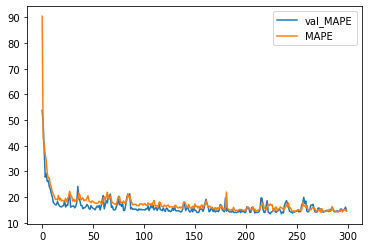

In [231]:
plt.plot(hist.history["val_MAPE"], label="val_MAPE")
plt.plot(hist.history["MAPE"], label="MAPE")
print("Min val MAPE:",np.min(hist.history["val_MAPE"]))
plt.legend()
plt.show()